In [5]:
#find the MEDV 中央値
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

boston = datasets.load_boston()
# change towards a data frame (only data)
boston_df = pd.DataFrame(boston.data)
# load the names
boston_df.columns = boston.feature_names
#define your goal variable
boston_df['MEDV']= boston.target



In [3]:
# look for missing values

boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
#線形回帰
from sklearn.linear_model import Lasso 

rgs = Lasso(normalize = True)

#learning variables
X_boston = boston_df.iloc[:,boston_df.columns!='MEDV']
Y_boston = boston_df["MEDV"]

params = {"alpha":[0, 0.001, 0.01,0.1, 1],"random_state":[0] }
cv_boston = GridSearchCV(rgs, params3, cv = 20 , n_jobs =-1,scoring= "neg_mean_squared_error")
cv_boston.fit(X_boston, y_boston )
print("計算完了")

計算完了


In [22]:
cv_boston.cv_results_['mean_test_score']

array([-31.6452746 , -31.48031827, -32.22701689, -41.6178923 ,
       -88.87120201])

In [26]:
print('the best hyperparameter is{}'.format(cv_boston.best_params_))
print('Its standard deviation is {:3f}'.format(cv_boston.cv_results_['std_test_score'][cv_boston.best_index_]))
print('The regression coefficient is{}'.format(cv_boston.best_estimator_.coef_))
print('Intercept at{}'.format(cv_boston.best_estimator_.intercept_))

the best hyperparameter is{'alpha': 0.001, 'random_state': 0}
Its standard deviation is 56.784521
The regression coefficient is[-1.00549239e-01  4.23750555e-02  0.00000000e+00  2.69026297e+00
 -1.65258561e+01  3.85232711e+00 -0.00000000e+00 -1.41597570e+00
  2.63004585e-01 -1.02547310e-02 -9.33489599e-01  9.08023522e-03
 -5.22501984e-01]
Intercept at34.83399436877524


In [33]:
#非線形
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_quadratic = quadratic.fit_transform(X_boston)
rgs.fit(X_quadratic,Y_boston)
params2 = {'alpha':[0,0.001,0.01,0.1,1],'random_state':[0]}

cv_boston2 = GridSearchCV(rgs, params2, cv=20, n_jobs=-1, scoring='neg_mean_squared_error')
cv_boston2.fit(X_quadratic,Y_boston)
print('finished')

finished


In [31]:
print('best hyperparameter is {}'.format(cv_boston2.best_params_))
print('the regression coefficient is {}'.format(cv_boston2.best_estimator_.coef_))
print('the intercept is {}'.format(cv_boston2.best_estimator_.intercept_))

best hyperparameter is {'alpha': 0.001, 'random_state': 0}
the regression coefficient is [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  7.31839578e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.11061040e+00  2.45660023e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.46243609e-04  5.48084095e-02
 -0.00000000e+00  2.85101471e+00 -1.61766629e-01 -0.00000000e+00
 -0.00000000e+00 -4.12514786e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.08768224e-04 -0.00000000e+00  1.51649242e-04
 -4.46424927e-03 -1.48801020e-02  0.00000000e+00  9.83058842e-04
 -0.00000000e+00 -0.00000000e+00 -4.39169321e-04  7.17767288e-05
  0.00000000e+00  0.00000000e+00 -4.27806056e-03  5.10818473e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.82817337e-03
 -4.42153549e-02  0.00000000e+00  6.42265222e-05 -0.00000000e+00
  0.00000000e+00 -2.15267063e-02  0.00000000e+00 -1.22118952e+01
 -3.69097385e-01  0.00000000e+00  4.87840274e-01 -4.23339865e-01
 

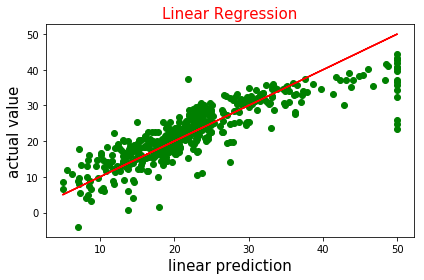

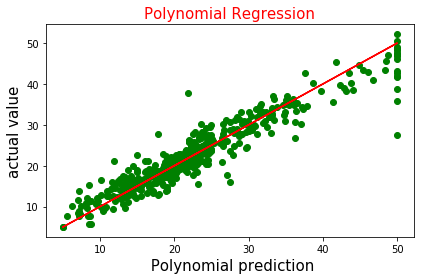

In [49]:
plt.scatter(Y_boston, cv_boston.predict(X_boston),c='g', )
plt.plot(Y_boston, Y_boston, color='r')
plt.xlabel('linear prediction', size=15)
plt.ylabel('actual value',size=15)
plt.title('Linear Regression', color='r',size=15)
plt.tight_layout()
plt.show()

plt.scatter(Y_boston, cv_boston2.predict(X_quadratic), c='g')
plt.plot(Y_boston, Y_boston, color ='r')

plt.xlabel(' Polynomial prediction', size=15)
plt.ylabel('actual value',size=15)
plt.title('Polynomial Regression', color='r',size=15)
plt.tight_layout()
plt.show()